In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
labels = data['label']

images = data.values[:, 1:]
images = images / images.max()

images = images.reshape(images.shape[0], 28, 28)

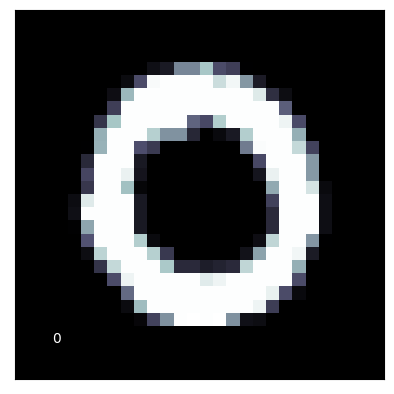


 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  1  1  5  5  8  3  3  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  1  3 10 10 10 10 10  9 10  6  1  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  1  7 10 10 10 10 10 10 10 10 10  9  2  1  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  3 10 10 10 10 10 10 10 10 10 10 10 10  4  0  0  0  0  0  0  0 
 0  0  0  0  0  0  2  7 10 10 10 10 10  4  3  8 10 10 10 10 10  3  0  0  0  0  0  0 
 0  0  0  0  0  0  7 10 10 10  8  6  6  2  0  0  1  8 10 10 10  7  0  0  0  0  0  0 
 0  0  0  0  0  0  7 10 10  3  3  0  0  0  0  0  0  5 10 10 10  8  3  0  0  0  0  0 
 0  0  0  0  0  2 10 10 10  1  0  0  0  0  0  0  0  0  3 10 10 1

In [4]:
def create_image(image_index, ax):
    image = images[image_index]
    label = labels[image_index]

    ax.imshow(image, cmap="bone")

    # Remove ticks
    ax.set(xticks=[], yticks=[])

    # Label image.
    ax.text(x=0.1, y=0.1, s=str(label), color="white", transform=ax.transAxes)

def show_pixel_values(image_index):
    image = images[image_index]
    for row in range(28):
        print()
        for col in range(28):
            tenths = round(image[row, col] * 10)
            print(f"{tenths : >2}", end=" ")

fig, ax = plt.subplots()
create_image(1, ax)
plt.show()

show_pixel_values(1)

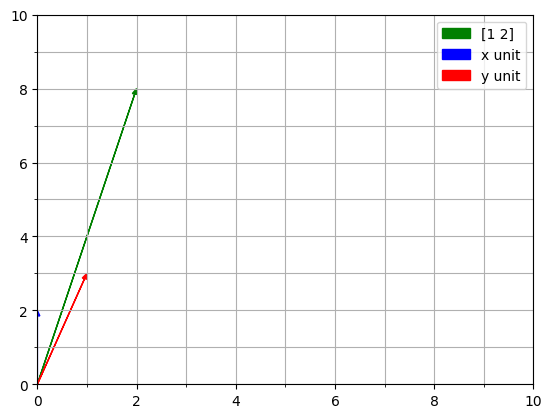

In [5]:
def plot_vector(vector: np.ndarray, label: str, color: str, ax: plt.Axes) -> None:
    ax.arrow(
        x=0, y=0, dx=vector[0], dy=vector[1],
        label=label, color=color,
        head_width=0.1, length_includes_head=True
    )

def plot_unit_vectors(matrix: np.ndarray, ax: plt.Axes) -> None:
    plot_vector(matrix[:, 0], "x unit", "blue", ax)
    plot_vector(matrix[:, 1], "y unit", "red", ax)


fig, ax = plt.subplots()

v = np.array([1, 2])
m = np.arange(4).reshape(2, 2)

plot_vector(np.dot(m, v), str(v), "green", ax)
plot_unit_vectors(m, ax)

# Config ticks and grid.
ax.set_xbound(0, 10)
ax.set_ybound(0, 10)

major_ticks = np.arange(0, 11, 2)
minor_ticks = np.arange(0, 11)

ax.set_xticks(major_ticks, minor=False)
ax.set_xticks(minor_ticks, minor=True)

ax.set_yticks(major_ticks, minor=False)
ax.set_yticks(minor_ticks, minor=True)

plt.grid(which="both")

plt.legend()

plt.show()

In [6]:
display(m, v)

array([[0, 1],
       [2, 3]])

array([1, 2])

In [7]:
m1 = np.arange(6).reshape(2, 3)
m2 = np.arange(9).reshape(3, 3)

display(m1, m2, np.dot(m1, m2))

array([[0, 1, 2],
       [3, 4, 5]])

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

array([[15, 18, 21],
       [42, 54, 66]])

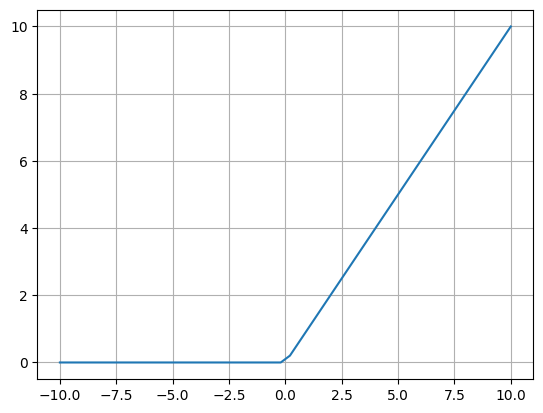

In [8]:
def ReLU(x: np.ndarray) -> np.ndarray:
    return np.maximum(x, 0)


x = np.linspace(-10, 10, num=50)
y = ReLU(x)

plt.plot(x, y)
plt.grid();

In [9]:
def softmax(Z: np.ndarray) -> np.ndarray:
    safe_Z = Z - Z.max(axis=0)
    e_Z = np.exp(safe_Z)
    return e_Z / np.sum(e_Z, axis=0)

Z = np.arange(6).reshape(3, 2)
display(Z, softmax(Z))

array([[0, 1],
       [2, 3],
       [4, 5]])

array([[0.01587624, 0.01587624],
       [0.11731043, 0.11731043],
       [0.86681333, 0.86681333]])

In [10]:
def one_hot_encode(Y):
    encoded = np.zeros((10, Y.size))
    encoded[Y, np.arange(Y.size)] = 1
    return encoded

y = np.arange(10)
display(y, one_hot_encode(y))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [11]:
def one_hot_decode(Z):
    decoded = np.argmax(Z, axis=0)
    return decoded

encoded = one_hot_encode(y)
display(encoded, one_hot_decode(encoded))

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [12]:
def mean_squared_error(A, Y):
    return np.mean((A - Y) ** 2)

true = np.arange(4)
guess = np.arange(2, 6)

display(true, guess, mean_squared_error(true, guess))

array([0, 1, 2, 3])

array([2, 3, 4, 5])

4.0

In [14]:
display(m, v, np.dot(m, v))

array([[0, 1],
       [2, 3]])

array([1, 2])

array([2, 8])